In [46]:
import numpy as np

In [47]:
import matplotlib.pylab as plt

In [48]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

In [49]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [50]:
np.random.seed(320)
x_train = np.linspace(-1, 1, 51)
y_train = 0.5 * x_train + 1.0 + 0.4 * np.random.rand(len(x_train))
print(len(x_train))
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

51


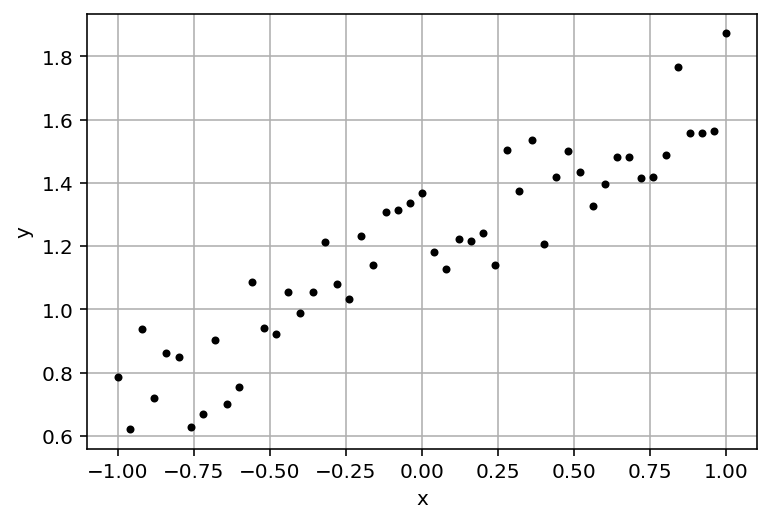

In [51]:
plt.plot(x_train, y_train, '.k')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [52]:
MaxEpoch = 1000

In [53]:
w = tf.Variable(tf.ones([1, 1]), dtype = tf.float32)
b = tf.Variable(tf.ones([1]), dtype = tf.float32)
x = tf.compat.v1.placeholder(tf.float32, [None, 1])
y = tf.compat.v1.placeholder(tf.float32, [None, 1])


In [54]:
y.hat = tf.matmul(x, w) + b

In [55]:
loss = tf.reduce_mean(tf.square(y.hat - y))
Lr = 0.25
optimizer = tf.compat.v1.train.GradientDescentOptimizer(Lr)
train = optimizer.minimize(loss)

In [56]:
init = tf.compat.v1.global_variables_initializer()

In [57]:
with tf.compat.v1.Session() as sess:
    sess.run(init)
    for epoch in range(MaxEpoch):
        curr_w, curr_b, curr_loss = sess.run([w, b, loss], feed_dict={x:x_train, y:y_train})
        if epoch % 5 == 0:
            print(curr_w, curr_b, curr_loss)
        sess.run(train, feed_dict={x:x_train, y:y_train})
    w_tf_gd, b_tf_gd = sess.run([w, b])
    
    #print(w_tf_gd, b_tf_gd)

[[1.]] [1.] 0.14998727
[[0.6727577]] [1.1888978] 0.028191052
[[0.54642326]] [1.1948009] 0.015662618
[[0.49765092]] [1.1949854] 0.013800872
[[0.478822]] [1.1949911] 0.013523399
[[0.47155294]] [1.1949912] 0.013482046
[[0.46874666]] [1.1949912] 0.013475881
[[0.4676633]] [1.1949912] 0.013474964
[[0.467245]] [1.1949912] 0.013474825
[[0.46708354]] [1.1949912] 0.013474804
[[0.4670212]] [1.1949912] 0.013474801
[[0.46699712]] [1.1949912] 0.0134748
[[0.46698782]] [1.1949912] 0.013474801
[[0.46698424]] [1.1949912] 0.0134748025
[[0.46698287]] [1.1949912] 0.0134748025
[[0.46698236]] [1.1949912] 0.013474801
[[0.46698216]] [1.1949912] 0.0134748025
[[0.46698207]] [1.1949912] 0.0134748025
[[0.46698207]] [1.1949912] 0.0134748025
[[0.46698207]] [1.1949912] 0.0134748025
[[0.46698207]] [1.1949912] 0.0134748025
[[0.46698207]] [1.1949912] 0.0134748025
[[0.46698207]] [1.1949912] 0.0134748025
[[0.46698207]] [1.1949912] 0.0134748025
[[0.46698207]] [1.1949912] 0.0134748025
[[0.46698207]] [1.1949912] 0.0134748025

In [58]:
def loss(w, x_set, y_set):
    N = len(x_set)
    val = 0.0
    for i in range(len(x_set)):
        val += 0.5 * ((w[0] * x_set[i] + w[i]) - y_set[i]) ** 2
    return val / N

In [59]:
def loss_grad(w, x_set, y_set):
    N = len(x_set)
    val = np.zeros(len(w))
    for i in range(len(x_set)):
        er = (w[0] * x_set[i] + w[i]) - y_set[i]
        val += er * np.array([x_set[i], 1.0])
    return val / N

In [60]:
import Batch

x_train = np.linspace(-1, 1, 50)
y_train = x_train ** 2 + 0.25 * x_train + 1.0 + 0.5 * np.random.rand(len(x_train))

np.random.seed(320)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)

shuffled_x_train = x_train[shuffled_id]
shuffled_y_train = y_train[shuffled_id]
batch_size = 5
init = tf.compat.v1.global_variables_initializer()

In [61]:
with tf.compat.v1.Session() as sess:
    sess.run(init)
    for epoch in range(MaxEpoch):
        curr_w, curr_b, curr_loss = sess.run([w, b, loss], feed_dict={x:x_train, y:y_train})
        if epoch % 5 == 0:
            print(curr_w, curr_b, curr_loss)
        for x_batch, y_batch in Batch.generate_batches(batch_size, shuffled_x_train, shuffled_y_train):
            sess.run(train, feed_dict={x:x_train, y:y_train})
            #print(y_train.shape)
    w_tf_gd, b_tf_gd = sess.run([w, b])
    
    #print(w_tf_gd, b_tf_gd)

ValueError: Cannot feed value of shape (50,) for Tensor Placeholder_4:0, which has shape (None, 1)

In [ ]:
import numpy as np

In [ ]:
import tensorflow as tf

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(324)

In [ ]:
x_train = np.linspace(-1, 1, 50)

In [ ]:
print(x_train)

In [ ]:
y_train = x_train ** 2 + 0.25 * x_train + 1.0 + 0.5 * np.random.rand(len(x_train))

In [ ]:
plt.plot(x_train, y_train, '.k')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
import Batch

w = tf.Variable(tf.ones([2.0, 1.0]))
b = tf.Variable(tf.ones([1]))

x = tf.compat.v1.placeholder(tf.float32, [None, 2])
y = tf.compat.v1.placeholder(tf.float32, [None, 1])
yhat = tf.matmul(x, w) + b
loss = tf.reduce_mean(tf.square(yhat - y))

np.random.seed(320)
labels = y_train.reshape(-1, 1)
features = np.stack(xval ** 2 for xval in x_train)

shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = features[shuffled_id]
shuffled_y_train = labels[shuffled_id]

init = tf.compat.v1.global_variables_initializer()

In [ ]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(MaxEpoch):
        curr_w, curr_b, curr_loss = sess.run([w, b, loss], feed_dict={x:features.reshape(-1, 1), y:labels})
        if epoch % 5 == 0:
            print(curr_w.reshape(1, -1), curr_b, curr_loss)
        for x_batch, y_batch in Batch.generate_batches(batch_size, shuffled_x_train, shuffled_y_train):
            sess.run(train, feed_dict={x:x_batch, y:y_batch})
    w_tf_gd, b_tf_gd = sess.run([w, b])
    prediction_values = sess.run(yhat, feed_dict={x:features})
print(prediction_values)    